# Presentation preparation
---

In [46]:
# %load nb_cell0.py
import os
import sys

print('Python: {}\n'.format(sys.version))
print('Currrent dir:', os.path.abspath(os.path.curdir))

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    for p in sys.path:
        p = os.path.abspath(p)
    if up:
        newp = os.path.abspath(os.path.join(this_path, '..'))
    else:
        newp = os.path.abspath(this_path)
        
    if this_path not in (p, p + os.sep):
        print('Path added to sys.path: {}'.format(newp))
        sys.path.insert(0, newp)
        
# if notebook inside another folder, eg ./notebooks:
up =  os.path.abspath(os.path.curdir).endswith('notebooks')
add_to_sys_path(os.path.curdir, up)

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

from pprint import pprint as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import HTML, Markdown, IFrame

%load_ext autoreload
%autoreload 2


Python: 3.6.7 (default, Feb 28 2019, 07:28:18) [MSC v.1900 64 bit (AMD64)]

Currrent dir: C:\Users\catch\Documents\GitHub\Geocoders_presentation\notebooks
Path added to sys.path: C:\Users\catch\Documents\GitHub\Geocoders_presentation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import geopy
from geopy import distance as geodist

print('geopy def. user_agent', geopy.geocoders.options.default_user_agent)
import geopandas as gpd

import requests
import json

geopy def. user_agent this_app/1


In [48]:
# project imports
from GeocodersComparison import (comparison as GeoComp4,
                                 inspect_geocoders,
                                 gc4utils,
                                 gc4settings)

# 1. RETRIEVE GLOBALS:

In [49]:
# Directories:
dir_geo = GeoComp4.DIR_GEO
dir_html = GeoComp4.DIR_HTML
dir_img = GeoComp4.DIR_IMG
dir_rpt = GeoComp4.DIR_RPT

dir_raw = os.path.join(dir_geo, 'rawjson')

# Query list:
# Each query list string is passed to the geocoding function.
query_lst = GeoComp4.query_lst
print("\nList of query strings that will be passed to each geocoder:")
for i, q in enumerate(query_lst):
    print('{}. {!r}'.format(i, q))

# Geoloders in the comparison:
colors_dict = GeoComp4.colors_dict

geocs = GeoComp4.geocs
print("\nGeocoders compared:\n", geocs)


List of query strings that will be passed to each geocoder:
0. 'New York City, NY, USA'
1. "Cleopatra's needle, Central Park, New York, NY, USA"
2. 'Bronx county, NY, USA'
3. 'Kings county, NY, USA'
4. 'New York county, NY, USA'
5. 'Queens county, NY, USA'
6. 'Richmond county, NY, USA'
7. 'Boston, MA, USA'

Geocoders compared:
 ['Nominatim', 'GoogleV3', 'ArcGis', 'AzureMaps']


# Examine geocoders  

# Inspect `geopy.geocoders` for apparent API requirements & test if effectively the case;
### The output message from `inspect_geopy_geocs(geopy_geocs_d, geopy_geocs_reqs)` will indicate any discrepancy.

In [50]:
geocs_dict = inspect_geocoders.get_dict_geocs_class()
n_geocs = len(geocs_dict)

geocs_reqs_dict = inspect_geocoders.get_dict_geocs_required_params(geocs_dict)
n_geocs_with_reqs = len(geocs_reqs_dict)

# Print basic info + test on new reqs:
print(inspect_geocoders.inspect_geopy_geocs(geocs_dict, geocs_reqs_dict))

Number of Geopy geocoders (minus Pelias): 23;
...... 16 (70%) of them have API requirements as of May 2019.



# After any necessary amendments, obtain a dataframe to list all geocoders, their classes, & required params

In [51]:
# def get_geocs_reqs_df(geocs_dict, geocs_reqs_dict, load_from_dict=True)
# the function checks for json file (geocs_class_reqs.json) holding a previous check & loads it if found;
# pass load_from_dict=False to get a fresh test.

df, geocs_class_reqs = inspect_geocoders.get_geocs_reqs_df(geocs_dict, geocs_reqs_dict)
df

C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\report\geocs_class_reqs.json


,Geocoder,Class,Requires,Comments
0,arcgis,'geopy.geocoders.arcgis.ArcGIS',None,
1,azure,'geopy.geocoders.azure.AzureMaps',[subscription_key],
2,baidu,'geopy.geocoders.baidu.Baidu',[api_key],Queries/results in Chinese
3,banfrance,'geopy.geocoders.banfrance.BANFrance',None,"Search restricted to the continental, European territory of France; limit=1 does not seem to work."
4,bing,'geopy.geocoders.bing.Bing',[api_key],
5,databc,'geopy.geocoders.databc.DataBC',None,
6,geocodeearth,'geopy.geocoders.geocodeearth.GeocodeEarth',[api_key],
7,geocodefarm,'geopy.geocoders.geocodefarm.GeocodeFarm',None,
8,geonames,'geopy.geocoders.geonames.GeoNames',[username],
9,google,'geopy.geocoders.googlev3.GoogleV3',[api_key],


In [52]:
rptname = inspect_geocoders.save_inspect_report(df, n_geocs, n_geocs_with_reqs)
#print(rptname)
HTML(filename=rptname)

C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\report\geocs_inspect.html


Geocoder,Class,Requires,Comments
arcgis,'geopy.geocoders.arcgis.ArcGIS',None,
azure,'geopy.geocoders.azure.AzureMaps',['subscription_key'],
baidu,'geopy.geocoders.baidu.Baidu',['api_key'],Queries/results in Chinese
banfrance,'geopy.geocoders.banfrance.BANFrance',None,"Search restricted to the continental, European territory of France; limit=1 does not seem to work."
bing,'geopy.geocoders.bing.Bing',['api_key'],
databc,'geopy.geocoders.databc.DataBC',None,
geocodeearth,'geopy.geocoders.geocodeearth.GeocodeEarth',['api_key'],
geocodefarm,'geopy.geocoders.geocodefarm.GeocodeFarm',None,
geonames,'geopy.geocoders.geonames.GeoNames',['username'],
google,'geopy.geocoders.googlev3.GoogleV3',['api_key'],


---

In [42]:
GOOGLE_KEY = GeoComp4.GOOGLE_KEY
AZURE_KEY = GeoComp4.AZURE_KEY
W3W_dict = GeoComp4.W3W_dict

In [9]:
cleo = query_lst[1]
lat_lon = (40.77963585, -73.96539645)
cleo

"Cleopatra's needle, Central Park, New York, NY, USA"

In [10]:
# set defaults for all geocoders
geopy.geocoders.options.default_user_agent = 'this_app/1'
geopy.geocoders.options.default_timeout = 5

# Direct vs .raw answer:

In [23]:
Man = "Manhattan, New York, NY USA"

In [43]:
goo = geopy.geocoders.GoogleV3(api_key=GOOGLE_KEY)

In [20]:
az = geopy.geocoders.AzureMaps(subscription_key=AZURE_KEY)
# domain:
az.geocode_path

'/search/address/json'

In [39]:
w3w = geopy.geocoders.What3Words(api_key=W3W_dict['W3W_API'])

--- 
## Raw output for same qry

In [22]:
ans = az.geocode(Man)
az_man_raw = ans.raw

In [25]:
ans = goo.geocode(Man)
goo_man_raw = ans.raw

In [32]:
az_man_raw_loc = az_man_raw['position']
az_man_raw

{'type': 'Geography',
 'id': 'US/GEO/p0/269198',
 'score': 11.161,
 'entityType': 'Municipality',
 'address': {'municipality': 'New York',
  'countrySecondarySubdivision': 'New York',
  'countryTertiarySubdivision': 'Manhattan',
  'countrySubdivision': 'NY',
  'countryCode': 'US',
  'country': 'United States Of America',
  'countryCodeISO3': 'USA',
  'freeformAddress': 'New York, NY',
  'countrySubdivisionName': 'New York'},
 'position': {'lat': 40.71305, 'lon': -74.00723},
 'viewport': {'topLeftPoint': {'lat': 40.9175, 'lon': -74.25909},
  'btmRightPoint': {'lat': 40.47738, 'lon': -73.70027}},
 'boundingBox': {'topLeftPoint': {'lat': 40.9175, 'lon': -74.25909},
  'btmRightPoint': {'lat': 40.47738, 'lon': -73.70027}},
 'dataSources': {'geometry': {'id': '0000554e-3200-3c00-0000-000059a734c0'}}}

In [29]:
goo_man_raw_loc = goo_man_raw['geometry']['location']
goo_man_raw

{'address_components': [{'long_name': 'Manhattan',
   'short_name': 'Manhattan',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': 'New York',
   'short_name': 'New York',
   'types': ['locality', 'political']},
  {'long_name': 'New York County',
   'short_name': 'New York County',
   'types': ['administrative_area_level_2', 'political']},
  {'long_name': 'New York',
   'short_name': 'NY',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']}],
 'formatted_address': 'Manhattan, New York, NY, USA',
 'geometry': {'bounds': {'northeast': {'lat': 40.882214, 'lng': -73.907},
   'southwest': {'lat': 40.6803955, 'lng': -74.047285}},
  'location': {'lat': 40.7830603, 'lng': -73.9712488},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 40.820045, 'lng': -73.90331300000001},
   'southwest': {'lat': 40.698078, 'lng': -74.03514899999999}}},
 'plac

In [41]:
msg = 'Results for query="{}", AzureMaps & GoogleMaps:\n'.format(Man)
msg += '   AzureMaps: ({}, {})\n'.format(az_man_raw_loc['lat'], az_man_raw_loc['lon'])
msg += '  GoogleMaps: ({}, {})'.format(goo_man_raw_loc['lat'], goo_man_raw_loc['lng'])
# az: Financial District, New York, NY (x: B'way and Murray St 1t City hall park)
#google: 225 Central Park West, New York, NY 10024
print(msg)

Results for query="Manhattan, New York, NY USA", AzureMaps & GoogleMaps:
   AzureMaps: (40.71305, -74.00723)
  GoogleMaps: (40.7830603, -73.9712488)


In [40]:
# test w3w with each of these results

---

In [250]:
# Let's retrieve cleo and the Met for later use with w3w:
cleo_geo = goo.geocode(cleo)
met_geo = goo.geocode("The Metropolitan museum, New York, NY, USA")

In [251]:
cleo_geo, met_geo

(Location(E 81st St, New York, NY 10024, USA, (40.7796358, -73.9653964, 0.0)),
 Location(1000 5th Ave, New York, NY 10028, USA, (40.7794366, -73.963244, 0.0)))

In [252]:
pp(cleo_geo.raw)

{'address_components': [{'long_name': 'East 81st Street',
                         'short_name': 'E 81st St',
                         'types': ['route']},
                        {'long_name': 'Manhattan',
                         'short_name': 'Manhattan',
                         'types': ['political',
                                   'sublocality',
                                   'sublocality_level_1']},
                        {'long_name': 'New York',
                         'short_name': 'New York',
                         'types': ['locality', 'political']},
                        {'long_name': 'New York County',
                         'short_name': 'New York County',
                         'types': ['administrative_area_level_2', 'political']},
                        {'long_name': 'New York',
                         'short_name': 'NY',
                         'types': ['administrative_area_level_1', 'political']},
                        {'long_name': 'United St

In [253]:
pp(met_geo.raw)

{'address_components': [{'long_name': '1000',
                         'short_name': '1000',
                         'types': ['street_number']},
                        {'long_name': '5th Avenue',
                         'short_name': '5th Ave',
                         'types': ['route']},
                        {'long_name': 'Manhattan',
                         'short_name': 'Manhattan',
                         'types': ['political',
                                   'sublocality',
                                   'sublocality_level_1']},
                        {'long_name': 'New York',
                         'short_name': 'New York',
                         'types': ['locality', 'political']},
                        {'long_name': 'New York County',
                         'short_name': 'New York County',
                         'types': ['administrative_area_level_2', 'political']},
                        {'long_name': 'New York',
                         'short_nam

In [254]:
met_box = met_geo.raw['geometry']['viewport']
# transform in NE, SW:
# bounding boxes as 2 corner pts: [NE], [SW]
met_bbx = ','.join(str(b) for b in [met_box['northeast']['lat'],
                               met_box['northeast']['lng'],
                               met_box['southwest']['lat'],
                               met_box['southwest']['lng']])
met_bbx

'40.7807855802915,-73.9618950197085,40.7780876197085,-73.96459298029151'

In [255]:
cleo_rev = goo.reverse(lat_lon, exactly_one=True)
print(cleo_rev)

lat, lon = cleo_rev.latitude, cleo_rev.longitude
print(lat, lon)

cleo_rev_raw = cleo_rev.raw
pp(cleo_rev_raw)

1000 5th Ave, New York, NY 10028, USA
40.7794366 -73.963244
{'address_components': [{'long_name': '1000',
                         'short_name': '1000',
                         'types': ['street_number']},
                        {'long_name': '5th Avenue',
                         'short_name': '5th Ave',
                         'types': ['route']},
                        {'long_name': 'Manhattan',
                         'short_name': 'Manhattan',
                         'types': ['political',
                                   'sublocality',
                                   'sublocality_level_1']},
                        {'long_name': 'New York',
                         'short_name': 'New York',
                         'types': ['locality', 'political']},
                        {'long_name': 'New York County',
                         'short_name': 'New York County',
                         'types': ['administrative_area_level_2', 'political']},
                        {

In [259]:
lat_lon

(40.77963585, -73.96539645)

---

In [256]:
w3w = geopy.geocoders.What3Words(api_key=W3W_dict['W3W_API'])

In [257]:
lat_lon = (40.77963585, -73.96539645)
w3w_cleo_rev = w3w.reverse(lat_lon)

In [258]:
w3w_cleo_rev[0], w3w_cleo_rev[1]

('drain.dull.harder', (40.779633, -73.965402))

In [366]:
w3w_cleo_rev_words = w3w_cleo_rev.raw['words']
w3w_cleo_rev_words

'drain.dull.harder'

In [367]:
pp(w3w_cleo_rev.raw)

{'bounds': {'northeast': {'lat': 40.779646, 'lng': -73.965385},
            'southwest': {'lat': 40.779619, 'lng': -73.96542}},
 'crs': {'properties': {'href': 'http://spatialreference.org/ref/epsg/4326/ogcwkt/',
                        'type': 'ogcwkt'},
         'type': 'link'},
 'geometry': {'lat': 40.779633, 'lng': -73.965402},
 'language': 'en',
 'map': 'https://w3w.co/drain.dull.harder',
 'status': {'reason': 'OK', 'status': 200},
 'thanks': 'Thanks from all of us at filled.count.soap for using a what3words '
           'API',
 'words': 'drain.dull.harder'}


In [369]:
# Forawrd geocoding: 3-words address -> geocoords
w3w_cleo_geo = w3w.geocode(w3w_cleo_rev_words)

In [370]:
w3w_cleo_geo

Location(drain.dull.harder, (40.779633, -73.965402, 0.0))

In [371]:
pp(w3w_cleo_geo.raw)

assert(w3w_cleo_rev.raw == w3w_cleo_geo.raw)

{'bounds': {'northeast': {'lat': 40.779646, 'lng': -73.965385},
            'southwest': {'lat': 40.779619, 'lng': -73.96542}},
 'crs': {'properties': {'href': 'http://spatialreference.org/ref/epsg/4326/ogcwkt/',
                        'type': 'ogcwkt'},
         'type': 'link'},
 'geometry': {'lat': 40.779633, 'lng': -73.965402},
 'language': 'en',
 'map': 'https://w3w.co/drain.dull.harder',
 'status': {'reason': 'OK', 'status': 200},
 'thanks': 'Thanks from all of us at filled.count.soap for using a what3words '
           'API',
 'words': 'drain.dull.harder'}


In [372]:
w3wfile = os.path.join(gc4settings.DIR_RPT, 'w3w.json')
with open(w3wfile, 'w') as fw:
    json.dump(w3w_cleo_rev.raw, fw)

In [386]:
params = {'key': W3W_dict['W3W_API'],
          'bbox': met_bbx}
# Bounding box, specified by the NE and SW corner coordinates, for which the grid should be returned.

url = 'https://api.what3words.com/v2/grid'
#?bbox=52.208867,0.117540,52.207988,0.116126&format=json&key=[API-KEY]
# Example value:bbox=52.208867,0.117540,52.207988,0.116126

r = requests.get(url, params=params)
result = r.json()

In [387]:
w3wfile = os.path.join(gc4settings.DIR_RPT, 'w3w_met_lines.geojson')

# create a geometry field:
dd = {'geometry':result['lines']}
with open(w3wfile, 'w') as fw:
    json.dump(dd, fw)

In [388]:
df_w3w = pd.read_json(w3wfile)
df_w3w

,geometry
0,"{'start': {'lng': -73.96459298029151, 'lat': 40.77811017680035}, 'end': {'lng': -73.9618950197085, 'lat': 40.77811017680035}}"
1,"{'start': {'lng': -73.96459298029151, 'lat': 40.778137128072444}, 'end': {'lng': -73.9618950197085, 'lat': 40.778137128072444}}"
2,"{'start': {'lng': -73.96459298029151, 'lat': 40.77816407934454}, 'end': {'lng': -73.9618950197085, 'lat': 40.77816407934454}}"
3,"{'start': {'lng': -73.96459298029151, 'lat': 40.77819103061664}, 'end': {'lng': -73.9618950197085, 'lat': 40.77819103061664}}"
4,"{'start': {'lng': -73.96459298029151, 'lat': 40.77821798188874}, 'end': {'lng': -73.9618950197085, 'lat': 40.77821798188874}}"
5,"{'start': {'lng': -73.96459298029151, 'lat': 40.778244933160835}, 'end': {'lng': -73.9618950197085, 'lat': 40.778244933160835}}"
6,"{'start': {'lng': -73.96459298029151, 'lat': 40.77827188443293}, 'end': {'lng': -73.9618950197085, 'lat': 40.77827188443293}}"
7,"{'start': {'lng': -73.96459298029151, 'lat': 40.77829883570503}, 'end': {'lng': -73.9618950197085, 'lat': 40.77829883570503}}"
8,"{'start': {'lng': -73.96459298029151, 'lat': 40.77832578697713}, 'end': {'lng': -73.9618950197085, 'lat': 40.77832578697713}}"
9,"{'start': {'lng': -73.96459298029151, 'lat': 40.778352738249225}, 'end': {'lng': -73.9618950197085, 'lat': 40.778352738249225}}"


In [392]:
line0 = result['lines'][0]

l0_start = (line0['start']['lng'], line0['start']['lat'])
l0_end = (line0['end']['lng'], line0['end']['lat'])

l0_segment = geodist.distance(l0_start, l0_end)

0.30111361528038266

In [394]:
l0_segment.mi

0.18710332612566527

In [395]:
l0_segment.km

0.30111361528038266

In [393]:
l0_segment.km*1000

301.11361528038265

In [327]:
df_w3w = pd.read_json(w3wfile)
df_w3w.reset_index(inplace=True)
df_w3w.drop('thanks', axis=1, inplace=True)
df_w3w.set_index('index')

,crs,words,bounds,geometry,language,map,status
index,,,,,,,
lat,NaN,drain.dull.harder,NaN,40.779633,en,https://w3w.co/drain.dull.harder,NaN
lng,NaN,drain.dull.harder,NaN,-73.965402,en,https://w3w.co/drain.dull.harder,NaN
northeast,NaN,drain.dull.harder,"{'lng': -73.965385, 'lat': 40.779646}",NaN,en,https://w3w.co/drain.dull.harder,NaN
properties,"{'href': 'http://spatialreference.org/ref/epsg/4326/ogcwkt/', 'type': 'ogcwkt'}",drain.dull.harder,NaN,NaN,en,https://w3w.co/drain.dull.harder,NaN
reason,NaN,drain.dull.harder,NaN,NaN,en,https://w3w.co/drain.dull.harder,OK
southwest,NaN,drain.dull.harder,"{'lng': -73.96542, 'lat': 40.779619}",NaN,en,https://w3w.co/drain.dull.harder,NaN
status,NaN,drain.dull.harder,NaN,NaN,en,https://w3w.co/drain.dull.harder,200
type,link,drain.dull.harder,NaN,NaN,en,https://w3w.co/drain.dull.harder,NaN


In [315]:
m = GeoComp4.get_map(lat_lon)
m

In [ ]:
def get_geocs_raw(geocs_dict, query_list, use_local=True, alt_prefix=''):
    
    # set defaults for all geocoders
    geopy.geocoders.options.default_user_agent = 'this_app/1'
    geopy.geocoders.options.default_timeout = 5

    for name, obj in geocs_dict.items():
        # set geocoders w/ required param, if account
        if name == 'google':
            g = obj(api_key=GOOGLE_KEY)

        elif name == 'azure':
            g = obj(subscription_key=AZURE_KEY)
            
        elif name == 'what3words':
            g = obj(api_key=W3W_dict['W3W_API'])
            
        raw = g.geocode(q).raw
    
        # save file (overwrite=default)
        outfile = os.path.join(DIR_GEO, 'raw', out)
        gc4utils.save_file(outfile, 'json', geodata)
        
        

# Step 1: check shapefile geometry

---

# 2. Load the data: 
### THIS IS THE DATA LOADING (FETCHING) FUNCTION IF `use_local=True` (`False`):
If `True`, `get_geo_dicts` will check for the json files in "../GeocodersComparison/geodata/";  
If the file does not exist, it will fetch it for each search string and each geocoders.

In [53]:
# Saved geolocation data for each item in query_lst and each geocoder in geocs.
# Returned in a list.
geo_dicts = GeoComp4.get_geo_dicts(geocs, query_lst, use_local=True)


Loading geodata...
Found: : C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\geodata_Nom.json, 14 days, 0h 53m 8s old
Found: : C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\geodata_Goo.json, 14 days, 0h 53m 8s old
Found: : C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\geodata_Arc.json, 14 days, 0h 53m 8s old
Found: : C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\geodata_Azu.json, 14 days, 0h 53m 8s old

All geodata variables gathered into list geo_dicts.



# 3. Get helper dicts for accessing the data:

In [54]:
# Places in the query list (they are the keys of the geo dicts), 
# used for accessing data for a particular place:
places, places_to_boros = GeoComp4.get_places(geo_dicts)
print(places)

['New York City', "Cleopatra's needle", 'Bronx county', 'Kings county', 'New York county', 'Queens county', 'Richmond county', 'Boston']


### Output example: data from Nominatim, the search engine of OpenStreetMap:

In [55]:
geo = geo_dicts[0]
p = places[1]  #cleo
geo[p]

{'loc': [40.77963585, -73.96539645],
 'box': [[40.779683, -73.9653329], [40.7795887, -73.96546]]}

# 4. Get dictionnary of DataFrames holding the location data and the distance differences

In [56]:
df_dict = GeoComp4.get_df_dict(geocs, geo_dicts, places)
print(list(df_dict.keys()))

['New York City', "Cleopatra's needle", 'Bronx county', 'Kings county', 'New York county', 'Queens county', 'Richmond county', 'Boston']


# 5. Load the geopandas dfs with shapefiles for maps:  

Note: The NYC shapefile is that which inculdes the water boundaries; it did not find the equivalent for Boston.

In [57]:
gdf_nyc_counties = GeoComp4.gdf_nyc_counties
gdf_boston = GeoComp4.gdf_boston

In [11]:
gdf_nyc_counties

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,203598.842067,9.443174e+08,"(POLYGON ((972081.7882080078 190733.4672241211, 972184.7658081055 190551.1359863281, 972398.541809082 190683.2208251953, 972384.9672241211 190709.016784668, 972407.1726074219 190721.4761962891, 97..."
1,2,Bronx,188054.398137,1.598379e+09,"POLYGON ((1021632.335632324 267934.4393920898, 1022108.577392578 267751.4205932617, 1022178.322021484 267761.5264282227, 1022216.077819824 267733.7739868164, 1022272.629394531 267697.1401977539, 1..."
2,5,Staten Island,210579.552313,2.532696e+09,"POLYGON ((968762.0665893555 175987.7493896484, 968654.2512207031 172187.4044189453, 968642.4882202148 171772.7758178711, 968623.9392089844 171379.014831543, 968576.4147949219 169443.7833862305, 96..."
3,3,Brooklyn,234978.813843,2.684409e+09,"POLYGON ((1001565.427429199 205174.1108398438, 1002424.723632813 204811.3392333984, 1003145.585021973 204689.5776367188, 1003869.71081543 204434.3583984375, 1003889.956787109 204421.4630126953, 10..."
4,4,Queens,429317.571157,3.858021e+09,"POLYGON ((1045438.074584961 235083.2955932617, 1049675.844787598 228569.0469970703, 1051509.902832031 227076.2908325195, 1053260.729187012 224604.1929931641, 1053403.75402832 224455.0557861328, 10..."


In [12]:
gdf_boston

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,1,Boston,1.346516e+09,816364.595339,"(POLYGON ((-71.19082535714033 42.28331516607344, -71.17871065804185 42.29448202254805, -71.16462312543568 42.30376625100558, -71.16386528078513 42.30321329400012, -71.16176080751673 42.30168331420..."


---
# Reporting: Prepare tables, images maps for use in final report.
---

# Output tables to html

# R.1. Table 1: Bounding box comparison between NYC and its county. Are they the same?  

## Purpose: To find out if my hypothesis that they should bears out.  

### Table 1: Alternate output as picture: may not be needed depending on the report type.

#### Example of picture output (embedded in markdown):

![Output of GeoComp4.df_to_pic(df_T_1, save_tbl_name='comp_NYC_NYCcnty_tbl')](../GeocodersComparison/images/comp_NYC_NYCcnty_tbl.svg)

# R.2. Table 2:
## Comparison of the center of the bounding box of a place with its location coordinates: Are they the same?  

## Purpose:  
* To find out the relationship between the two, for instance, the location of a county (usually) returns the coordinates of the administrative county seat, so there should not be identical to the center of the county bounding box.
* To discover the consistency of each geocoders: ArcGis and GoogleV3 are the most consistent (with the exception of "Cleopatra's needle", which is a monument, for the later).
However, they are "anticorrelated": with ArcGis, the answer is always True and its is ~always False with GoogleV3.
Surely, both cannot be right (more on this later)!

![Output of GeoComp4.df_to_pic(df_T_2, save_tbl_name='comp_Loc_Center_tbl')](../GeocodersComparison/images/comp_Loc_Center_tbl.svg)

# R.3. Table 3: Pairwise, quantitative comparison of the geocoders' results: Is there a huge difference?  

## First load the prepared dataframes; 1st df: location & corners (lat, lon), 2nd df: pairwise distance difference:

In [58]:
# Output them all:
all_tables_3 = GeoComp4.output_tables_3(places, df_dict)

C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\New_York_City_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Cleopatra's_needle_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Bronx_county_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Kings_county_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\New_York_county_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Queens_county_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Richmond_county_dist_diff.html
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\geodata\html_frames\Boston_dist_diff.html


In [59]:
all_tables_3[7]

'C:\\Users\\catch\\Documents\\GitHub\\Geocoders_presentation\\GeocodersComparison\\geodata\\html_frames\\Boston_dist_diff.html'

In [25]:
HTML(all_tables_3[7])

# R.4: Heatmaps of quantitative differences

## Provides a visual summary of the geodesic distance differences

Notes:
* The heatmap coloring is calculated given an acceptable difference of 5 km (`my_max_acceptable_difference = 5`)
* By default, the plot is saved and not shown --the next cell is used to display it.
* The first time run of get_geo_dist_heatmap() takes ~ 8 seconds, the next one under 3.

# Heatmap 1: Distance differences in kilometers (default unit)

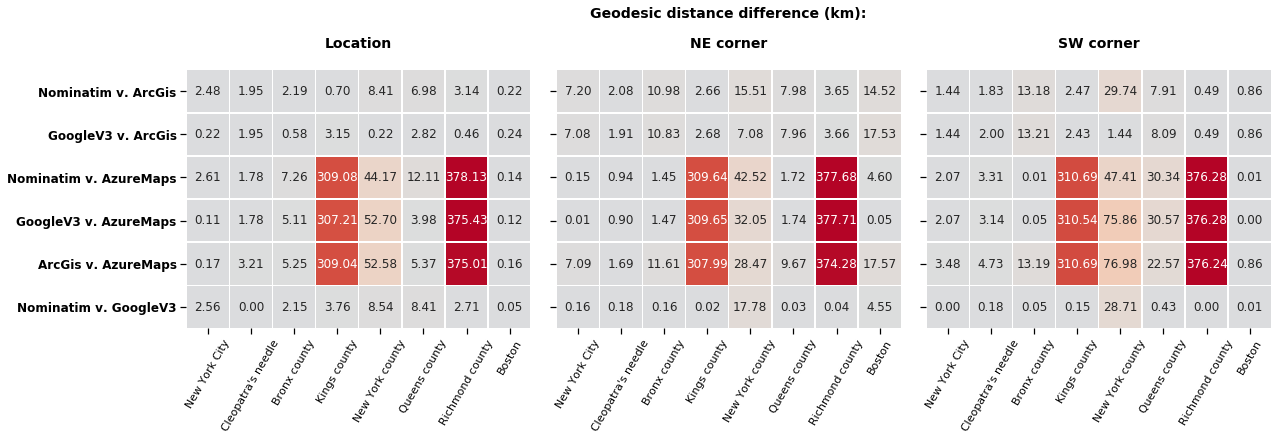

In [26]:
# comment to use existing image
GeoComp4.get_geo_dist_heatmap(places, df_dict)  #, save_fig=False)

### To embed existing image in markdown: 
```
![Output of GeocodersComparison.get_geo_dist_heatmap(places, df_dict)](../GeocodersComparison/images/Heatmap_sns_geodist_difference_km.svg)
```

![Output of GeocodersComparison.get_geo_dist_heatmap(places, df_dict)](../GeocodersComparison/images/Heatmap_sns_geodist_difference_km.svg)

# Heatmap 2: Distance differences in miles

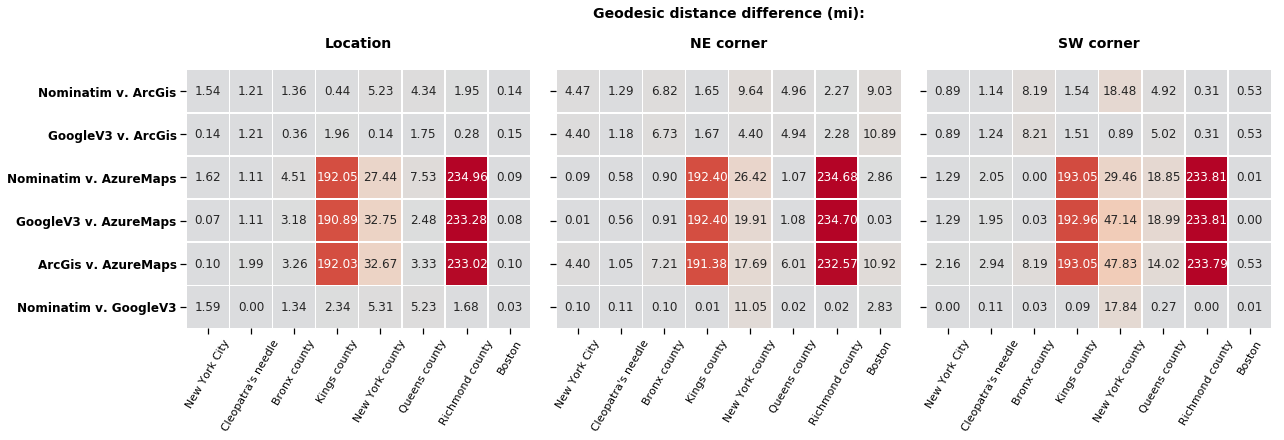

In [27]:
GeoComp4.get_geo_dist_heatmap(places, df_dict, unit='mi')

---
---
# Maps!

---

## New York City

In [28]:
p = places[0]
df1 = df_dict[p][0]

print('Result map for this query: "{}"'.format(query_lst[0]))
boro = places_to_boros[p]
m_nyc = GeoComp4.get_boro_maps(boro, df1, gdf_nyc_counties, filter_bounds=False, zoom=9.5, colors_d=colors_dict)
m_nyc

Result map for this query: "New York City, NY, USA"


## New York county (Manhattan)

In [29]:
p = places[4]
boro = places_to_boros[p]
df2 = df_dict[p][0]

print('Result map for this query: "{}"'.format(query_lst[4]))
m_nyc_county = GeoComp4.get_boro_maps(boro, df2, gdf_nyc_counties, colors_d=colors_dict)
m_nyc_county

Result map for this query: "New York county, NY, USA"


## Cleopatra's needle in Central Park

In [30]:
p = places[1]
boro = places_to_boros[p]

df3 = df_dict[p][0]

print('Result map (zoom=11) for this query: "{}"'.format(query_lst[1]))
m_cleo = GeoComp4.get_boro_maps(boro, df3, gdf_nyc_counties, zoom=11, colors_d=colors_dict, file_suffix='zoomed_out')
m_cleo

Result map (zoom=11) for this query: "Cleopatra's needle, Central Park, New York, NY, USA"


In [31]:
# Same, zoomed
print('Result map (zoom=18) for this query: "{}"'.format(query_lst[1]))
GeoComp4.get_boro_maps(boro, df3, gdf_nyc_counties, zoom=18, colors_d=colors_dict, file_suffix='zoomed_in')

Result map (zoom=18) for this query: "Cleopatra's needle, Central Park, New York, NY, USA"


## Bronx

In [32]:
p = places[2]
boro = places_to_boros[p]
df4 = df_dict[p][0]

print('Result map for this query: "{}"'.format(query_lst[2]))
m_bronx = GeoComp4.get_boro_maps(boro, df4, gdf_nyc_counties,colors_d=colors_dict)
m_bronx

Result map for this query: "Bronx county, NY, USA"


## Brooklyn

In [33]:
p = places[3]
boro = places_to_boros[p]
df5 = df_dict[p][0]

print('Result map (zoom=11) for this query: "{}"'.format(query_lst[3]))
m_brooklyn = GeoComp4.get_boro_maps(boro, df5, gdf_nyc_counties, colors_d=colors_dict, zoom=11, file_suffix='zoomed_in')
m_brooklyn

Result map (zoom=11) for this query: "Kings county, NY, USA"


In [34]:
print('Result map (zoom=7) for this query: "{}"'.format(query_lst[3]))
GeoComp4.get_boro_maps(boro, df5, gdf_nyc_counties, colors_d=colors_dict, zoom=7, file_suffix='zoomed_out')

Result map (zoom=7) for this query: "Kings county, NY, USA"


## Queens

In [35]:
p = places[5]
boro = places_to_boros[p]

df6 = df_dict[p][0]

print('Result map for this query: "{}"'.format(query_lst[5]))
m_queens = GeoComp4.get_boro_maps(boro, df6, gdf_nyc_counties, colors_d=colors_dict)
m_queens

Result map for this query: "Queens county, NY, USA"


## Richmond county (Staten Island)

In [36]:
p = places[6]
boro = places_to_boros[p]

df7 = df_dict[p][0]
#df7
print('Result map (zoom=11) for this query: "{}"'.format(query_lst[6]))
m_si = GeoComp4.get_boro_maps(boro, df7, gdf_nyc_counties, colors_d=colors_dict, zoom=11, file_suffix='zoomed_in')
m_si

Result map (zoom=11) for this query: "Richmond county, NY, USA"


In [37]:
# Same, zoomed out:
print('Result map (zoom=7) for this query: "{}"'.format(query_lst[6]))
GeoComp4.get_boro_maps(boro, df7, gdf_nyc_counties, colors_d=colors_dict, zoom=7, file_suffix='zoomed_out')

Result map (zoom=7) for this query: "Richmond county, NY, USA"


## Boston
 
### This Folium map [does not display in notebook cell via Chrome,](https://github.com/python-visualization/folium/issues/812#issuecomment-361713656) but is correctly saved. I use `IPython.display.IFrame` to show it.

Note: Simplifying the shapefile geometry fixes the problem but it creates artifacts due to the complicated shape, so I did not use it.

In [38]:
p = places[7]
boro = 'Boston'
df8 = df_dict[p][0]

print('Result map for this query: "{}"'.format(query_lst[7]))
m_boston = GeoComp4.get_boro_maps(boro, df8, gdf_boston, filter_bounds=False, colors_d=colors_dict)

Result map for this query: "Boston, MA, USA"


In [39]:
# the relative path is needed for IFrame
dir_rel_boston = os.path.relpath(os.path.join(dir_html, 'Boston.html'))
IFrame(dir_rel_boston, 1260, 600)

---

In [40]:
gc4utils.caveat_codor()

The code and information herein is valid given my understanding and this environment:<br>3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)] | win32<br>As of:  April 2019